In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('fifa21_train.csv')

data

ID            Name  Age  Nationality                        Club  \
0      184383       A. Pasche   26  Switzerland           FC Lausanne-Sport   
1      188044   Alan Carvalho   30     China PR     Beijing Sinobo Guoan FC   
2      184431     S. Giovinco   33        Italy                    Al Hilal   
3      233796        J. Evans   22        Wales                Swansea City   
4      234799      Y. Demoncy   23       France  US Orléans Loiret Football   
...       ...             ...  ...          ...                         ...   
11696  232504   B. Böðvarsson   25      Iceland       Jagiellonia Białystok   
11697  214680       G. Gallon   27       France                ESTAC Troyes   
11698  221489       J. Flores   22        Chile              CD Antofagasta   
11699  146717  Anderson Silva   26       Brazil                    Barnsley   
11700  236507     T. Conechny   22    Argentina            Portland Timbers   

        BP   Position                               Team & Contract Height  \
0       CM     CM CDM                 FC Lausanne-Sport 2015 ~ 2020   5'9"   
1       ST   ST LW LM  Beijing Sinobo Guoan FC Dec 31, 2020 On Loan   6'0"   
2      CAM     CAM CF                          Al Hilal 2019 ~ 2022   5'4"   
3      CDM     CDM CM                      Swansea City 2016 ~ 2021  5'10"   
4      CDM     CDM CM        US Orléans Loiret Football 2018 ~ 2021  5'11"   
...    ...        ...                                           ...    ...   
11696   LB         LB             Jagiellonia Białystok 2018 ~ 2021   6'1"   
11697   GK         GK                      ESTAC Troyes 2019 ~ 2022   6'1"   
11698   RM  LM CAM RM                    CD Antofagasta 2019 ~ 2024   5'6"   
11699   CM        NaN                                 Barnsley 2010   6'2"   
11700  CAM  ST CAM LM                  Portland Timbers 2019 ~ 2020   5'7"   

       Weight  ...   CDM   RDM   RWB    LB   LCB    CB   RCB    RB    GK  OVA  
0      161lbs  ...  59+1  59+1  59+1  58+1  54+1  54+1  54+1  58+1  15+1   64  
1      159lbs  ...  53+2  53+2  57+2  53+2  48+2  48+2  48+2  53+2  18+2   77  
2      134lbs  ...  56+2  56+2  59+2  53+2  41+2  41+2  41+2  53+2  12+2   80  
3      152lbs  ...  58+2  58+2  56+2  57+2  58+2  58+2  58+2  57+2  14+2   59  
4      150lbs  ...  64+2  64+2  64+2  63+2  61+2  61+2  61+2  63+2  15+2   65  
...       ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  
11696  168lbs  ...  60+2  60+2  63+2  63+2  61+2  61+2  61+2  63+2  16+2   65  
11697  174lbs  ...  26+2  26+2  25+2  24+2  26+2  26+2  26+2  24+2  69+2   70  
11698  143lbs  ...  44+2  44+2  49+2  45+2  35+2  35+2  35+2  45+2  17+2   67  
11699  179lbs  ...  68+0  68+0  66+0  64+0  60+0  60+0  60+0  64+0  25+0   68  
11700  143lbs  ...  43+2  43+2  46+2  44+2  36+2  36+2  36+2  44+2  15+2   64  

[11701 rows x 101 columns]

In [3]:
#removing duplicates
data = data.drop_duplicates()

In [4]:
# removing some columns
cols_for_removing = ['ID', 'Name','Club','Position','Height', 'Nationality','Contract', 'Team & Contract', 'Weight', 'foot', 'Joined', 'Loan Date End', 'Release Clause']

data_cleaned = data.drop(cols_for_removing, axis=1)

In [5]:
#removing NaN's
data_cleaned = data_cleaned.dropna()

In [6]:
data_cleaned.shape

(11422, 88)

In [7]:
#column_names = data_cleaned.columns.tolist()
#column_names


####################### name:    data_cleaned

In [8]:
# Wypisz kolumny numeryczne
numeric_columns = data_cleaned.select_dtypes(include=['number'])
print("Numerical:")
print(numeric_columns.columns)

Numerical:
Index(['Age', 'Growth', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVA'],
      dtype='object')


In [9]:
# Wypisz kolumny nienumeryczne
non_numeric_columns = data_cleaned.select_dtypes(exclude=['number'])
print("non numeric:")
print(non_numeric_columns.columns)

non numeric:
Index(['BP', 'Value', 'Wage', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'GK'],
      dtype='object')


In [10]:
data_cleaned

Age   BP  Growth  Value  Wage  Attacking  Crossing  Finishing  \
0       26   CM       1  €525K   €4K        258        54         47   
1       30   ST       0  €8.5M  €23K        365        66         79   
2       33  CAM       0    €9M  €49K        336        73         76   
3       22  CDM      13  €275K   €4K        242        44         42   
4       23  CDM       8  €725K   €2K        249        49         37   
...    ...  ...     ...    ...   ...        ...       ...        ...   
11695   29   ST       0  €550K  €500        290        36         72   
11696   25   LB       5  €625K   €3K        224        62         24   
11697   27   GK       4  €1.6M   €4K         84        12         14   
11698   22   RM       8  €1.1M   €2K        286        64         66   
11700   22  CAM       9  €700K   €2K        289        43         64   

       Heading Accuracy  Short Passing  ...   CDM   RDM   RWB    LB   LCB  \
0                    43             70  ...  59+1  59+1  59+1  58+1  54+1   
1                    76             68  ...  53+2  53+2  57+2  53+2  48+2   
2                    34             78  ...  56+2  56+2  59+2  53+2  41+2   
3                    58             62  ...  58+2  58+2  56+2  57+2  58+2   
4                    61             68  ...  64+2  64+2  64+2  63+2  61+2   
...                 ...            ...  ...   ...   ...   ...   ...   ...   
11695                65             57  ...  45+2  45+2  46+2  44+2  43+2   
11696                51             59  ...  60+2  60+2  63+2  63+2  61+2   
11697                13             29  ...  26+2  26+2  25+2  24+2  26+2   
11698                51             64  ...  44+2  44+2  49+2  45+2  35+2   
11700                65             64  ...  43+2  43+2  46+2  44+2  36+2   

         CB   RCB    RB    GK  OVA  
0      54+1  54+1  58+1  15+1   64  
1      48+2  48+2  53+2  18+2   77  
2      41+2  41+2  53+2  12+2   80  
3      58+2  58+2  57+2  14+2   59  
4      61+2  61+2  63+2  15+2   65  
...     ...   ...   ...   ...  ...  
11695  43+2  43+2  44+2  19+2   65  
11696  61+2  61+2  63+2  16+2   65  
11697  26+2  26+2  24+2  69+2   70  
11698  35+2  35+2  45+2  17+2   67  
11700  36+2  36+2  44+2  15+2   64  

[11422 rows x 88 columns]

In [11]:
for column in non_numeric_columns.columns:
    unique_values = data[column].unique()
    print(f"Unique values for: '{column}':")
    print(unique_values)
    print("\n" + "="*50 + "\n")

Unique values for: 'BP':
['CM' 'ST' 'CAM' 'CDM' 'LM' 'RB' 'CB' 'RM' 'GK' 'LB' 'RW' 'LWB' 'LW' 'RWB'
 'CF']


Unique values for: 'Value':
['€525K' '€8.5M' '€9M' '€275K' '€725K' '€1.4M' '€6M' '€300K' '€210K'
 '€220K' '€625K' '€650K' '€800K' '€5M' '€130K' '€1.1M' '€325K' '€825K'
 '€500K' '€350K' '€1M' '€475K' '€160K' '€675K' '€14.5M' '€900K' '€0'
 '€425K' '€450K' '€60K' '€10M' '€1.8M' '€750K' '€700K' '€1.5M' '€16.5M'
 '€6.5M' '€180K' '€2.6M' '€41M' '€600K' '€200K' '€3.2M' '€44M' '€2.7M'
 '€4.5M' '€875K' '€7.5M' '€110K' '€11.5M' '€975K' '€2.3M' '€550K' '€170K'
 '€850K' '€925K' '€775K' '€80K' '€3.3M' '€575K' '€375K' '€1.3M' '€1.2M'
 '€3.5M' '€1.9M' '€190K' '€250K' '€19.5M' '€100K' '€90K' '€5.5M' '€4.2M'
 '€140K' '€400K' '€2.9M' '€4.4M' '€2M' '€240K' '€4.6M' '€230K' '€7M'
 '€2.8M' '€13.5M' '€4.3M' '€8M' '€4.8M' '€20.5M' '€150K' '€9.5M' '€2.1M'
 '€120K' '€3.6M' '€15.5M' '€12.5M' '€3.4M' '€2.5M' '€1.7M' '€41.5M'
 '€1.6M' '€2.4M' '€13M' '€14M' '€3.9M' '€3M' '€12M' '€15M' '€950K' '€4M'
 '€10.5M'

In [12]:
non_numeric_columns.columns

Index(['BP', 'Value', 'Wage', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'GK'],
      dtype='object')

In [13]:
def removing_euro(x):
    x = str(x).replace('€','') 
    
    if x[-1] == 'K':
        x = str(x).replace('K','')
        x = str(float(x)*1000)
    if x[-1] == 'M':
        x = str(x).replace('M','')
        x = str(float(x)*1000000)
    return x


columns_to_modify = ['Value', 'Wage', 'Hits']

for i in columns_to_modify:
    data_cleaned[i] = list(map(removing_euro, data_cleaned[i]))
    data_cleaned[i] = pd.to_numeric(data_cleaned[i], errors='coerce')
    

data_cleaned['Value'].dtype

dtype('float64')

In [14]:
'''
def removing_star(x):        
    x = x[0]
    return int(x)

columns_to_modify = ['W/F', 'SM', 'IR']

for i in columns_to_modify:
    data_cleaned[i] = list(map(removing_star, data_cleaned[i]))

data_cleaned['SM'].dtype
'''


data_cleaned['W/F'].str.replace('★', '')
data_cleaned['SM'].str.replace('★', '')
data_cleaned['IR'].str.replace('★', '') 

0        1 
1        2 
2        2 
3        1 
4        1 
         ..
11695    1 
11696    1 
11697    1 
11698    1 
11700    1 
Name: IR, Length: 11422, dtype: object

In [15]:
#data_cleaned['BP'] = data_cleaned['BP'].replace({'RB':'Defender', 'LB':'Defender', 'CB':'Defender', 'LWB' : 'Defender', 'RWB':'Defender'})
#data_cleaned['BP'] = data_cleaned['BP'].replace({'RW':'Midfielder', 'LW':'Midfielder', 'RM':'Midfielder', 'LM' : 'Midfielder', 'CDM':'Midfielder', 'CAM':'Midfielder','CM':'Midfielder'})
#data_cleaned['BP'] = data_cleaned['BP'].replace({'ST': 'Striker', 'CF': 'Striker'})

In [16]:
def adding_values(x):
    x = str(x).split('+')
    if len(x) > 1:
        x = int(x[0]) + int(x[1])
    return x
                                                    

columns_to_modify = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']

for i in columns_to_modify:
    data_cleaned[i] = list(map(adding_values, data_cleaned[i]))
 #  data_cleaned[i] = pd.to_numeric(data_cleaned[i], errors='coerce')
    

data_cleaned['LS']

0        59
1        77
2        75
3        52
4        58
         ..
11695    65
11696    50
11697    30
11698    64
11700    66
Name: LS, Length: 11422, dtype: int64

In [17]:
data_cleaned

Age   BP  Growth      Value     Wage  Attacking  Crossing  Finishing  \
0       26   CM       1   525000.0   4000.0        258        54         47   
1       30   ST       0  8500000.0  23000.0        365        66         79   
2       33  CAM       0  9000000.0  49000.0        336        73         76   
3       22  CDM      13   275000.0   4000.0        242        44         42   
4       23  CDM       8   725000.0   2000.0        249        49         37   
...    ...  ...     ...        ...      ...        ...       ...        ...   
11695   29   ST       0   550000.0    500.0        290        36         72   
11696   25   LB       5   625000.0   3000.0        224        62         24   
11697   27   GK       4  1600000.0   4000.0         84        12         14   
11698   22   RM       8  1100000.0   2000.0        286        64         66   
11700   22  CAM       9   700000.0   2000.0        289        43         64   

       Heading Accuracy  Short Passing  ...  CDM  RDM  RWB  LB  LCB  CB  RCB  \
0                    43             70  ...   60   60   60  59   55  55   55   
1                    76             68  ...   55   55   59  55   50  50   50   
2                    34             78  ...   58   58   61  55   43  43   43   
3                    58             62  ...   60   60   58  59   60  60   60   
4                    61             68  ...   66   66   66  65   63  63   63   
...                 ...            ...  ...  ...  ...  ...  ..  ...  ..  ...   
11695                65             57  ...   47   47   48  46   45  45   45   
11696                51             59  ...   62   62   65  65   63  63   63   
11697                13             29  ...   28   28   27  26   28  28   28   
11698                51             64  ...   46   46   51  47   37  37   37   
11700                65             64  ...   45   45   48  46   38  38   38   

       RB  GK  OVA  
0      59  16   64  
1      55  20   77  
2      55  14   80  
3      59  16   59  
4      65  17   65  
...    ..  ..  ...  
11695  46  21   65  
11696  65  18   65  
11697  26  71   70  
11698  47  19   67  
11700  46  17   64  

[11422 rows x 88 columns]

In [18]:
data_cleaned.isna().sum()

Age       0
BP        0
Growth    0
Value     0
Wage      0
         ..
CB        0
RCB       0
RB        0
GK        0
OVA       0
Length: 88, dtype: int64

In [19]:
data_cleaned.dtypes

Age         int64
BP         object
Growth      int64
Value     float64
Wage      float64
           ...   
CB          int64
RCB         int64
RB          int64
GK          int64
OVA         int64
Length: 88, dtype: object

In [20]:
data_cleaned.describe().T

count          mean           std   min        25%       50%  \
Age        11422.0  2.515558e+01  4.872713e+00  16.0      21.00      25.0   
Growth     11422.0  5.593241e+00  5.824869e+00   0.0       0.00       4.0   
Value      11422.0  2.584324e+06  5.317007e+06   0.0  375000.00  800000.0   
Wage       11422.0  1.031218e+04  2.116123e+04   0.0    1000.00    3000.0   
Attacking  11422.0  2.581143e+02  7.221661e+01  42.0     231.25     271.0   
...            ...           ...           ...   ...        ...       ...   
CB         11422.0  5.490159e+01  1.440434e+01  18.0      45.00      57.0   
RCB        11422.0  5.490159e+01  1.440434e+01  18.0      45.00      57.0   
RB         11422.0  5.620776e+01  1.353551e+01  15.0      49.00      59.0   
GK         11422.0  2.273218e+01  1.451268e+01  11.0      17.00      18.0   
OVA        11422.0  6.687664e+01  6.845047e+00  45.0      62.00      67.0   

                 75%         max  
Age             29.0        43.0  
Growth          10.0        26.0  
Value      2500000.0  90000000.0  
Wage         10000.0    560000.0  
Attacking      305.0       437.0  
...              ...         ...  
CB              66.0        89.0  
RCB             66.0        89.0  
RB              66.0        86.0  
GK              20.0        91.0  
OVA             72.0        93.0  

[82 rows x 8 columns]

In [21]:
data_cleaned.columns

Index(['Age', 'BP', 'Growth', 'Value', 'Wage', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF',
       'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
       'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK',
       'OVA'],
      dt

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='BP', ylabel='OVA'>

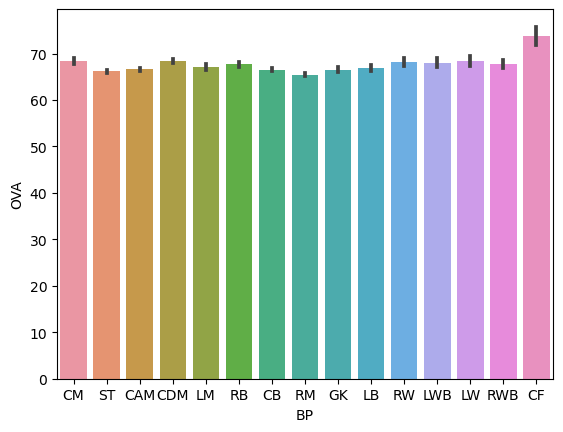

In [23]:
sns.barplot(y='OVA', x='BP', data=data_cleaned)

<Axes: xlabel='Age', ylabel='Strength'>

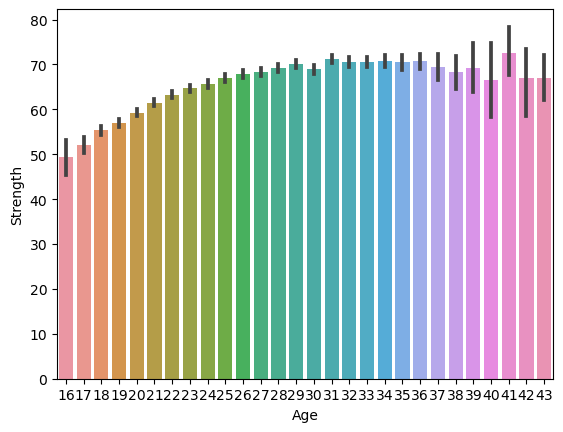

In [24]:
sns.barplot(y='Strength', x='Age', data=data_cleaned)

<Axes: xlabel='Age', ylabel='Acceleration'>

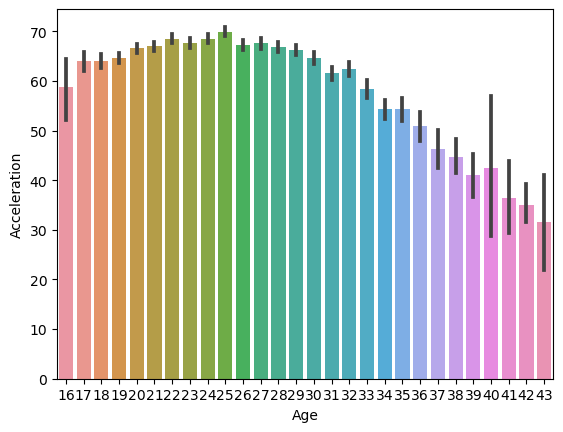

In [25]:
sns.barplot(y='Acceleration', x='Age', data=data_cleaned)

<Axes: xlabel='OVA', ylabel='Value'>

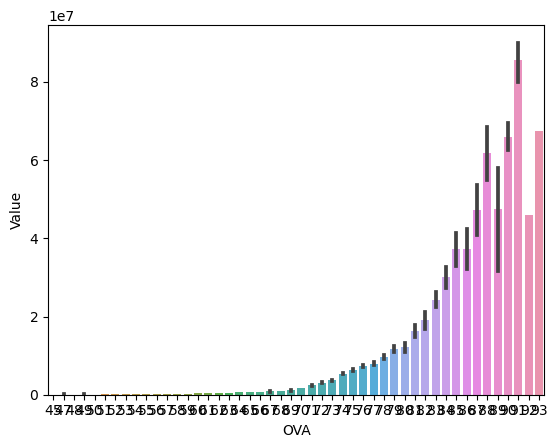

In [26]:
sns.barplot(y='Value', x='OVA', data=data_cleaned)

In [27]:
categorical = data_cleaned.select_dtypes(include=object)
numerical = data_cleaned.select_dtypes(include=np.number)

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


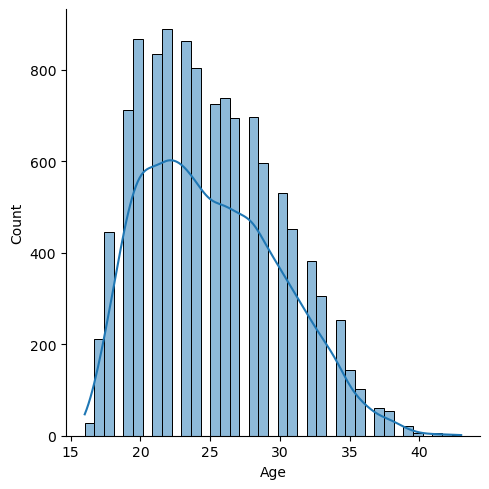

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


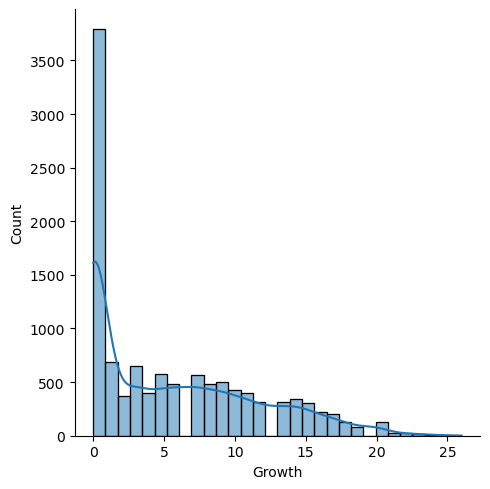

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


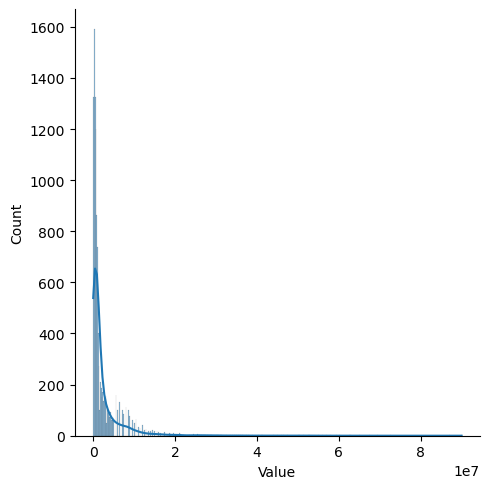

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


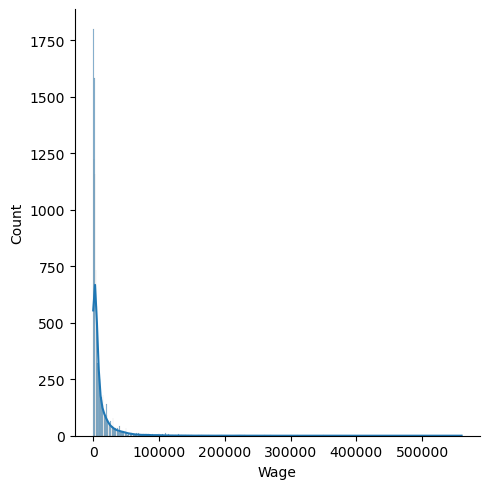

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


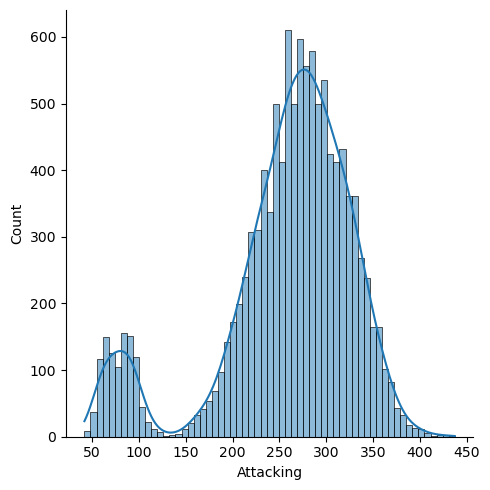

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


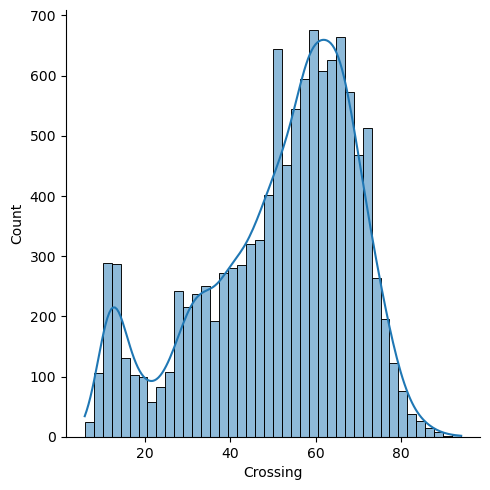

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


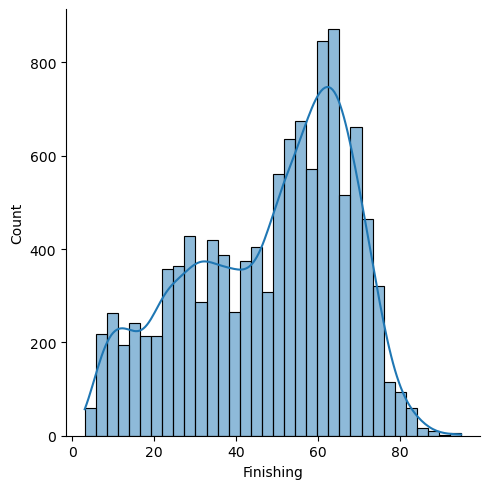

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


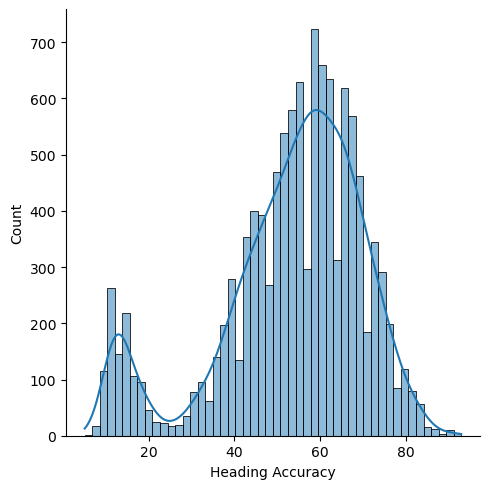

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


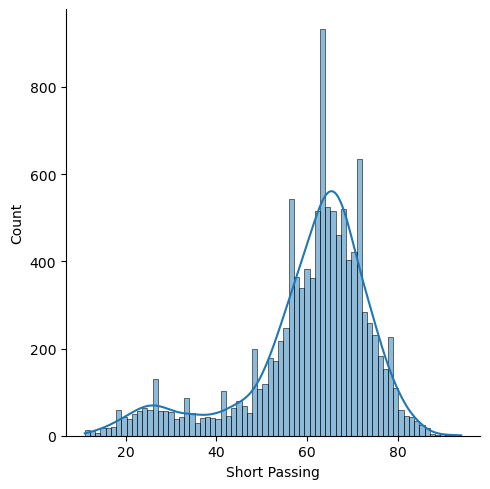

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


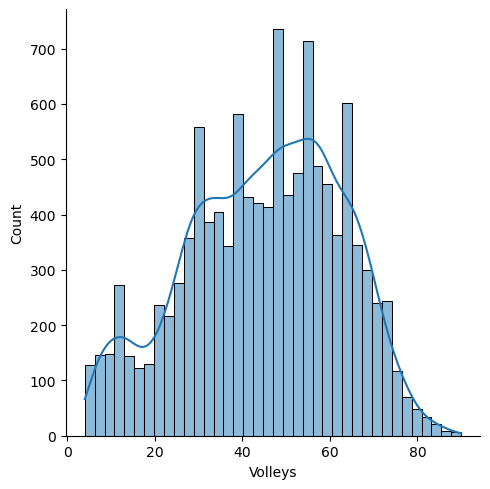

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


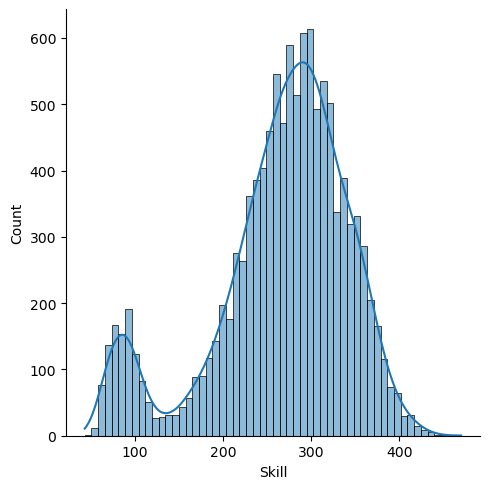

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


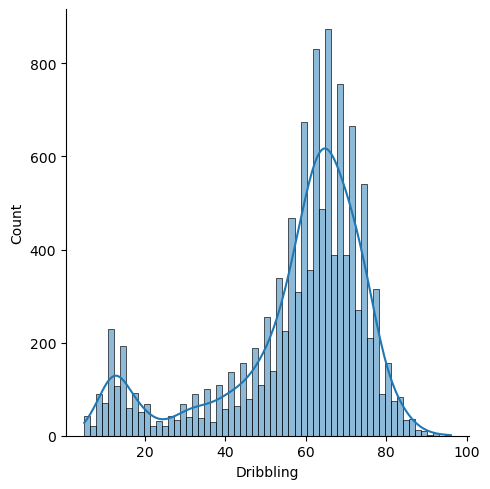

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


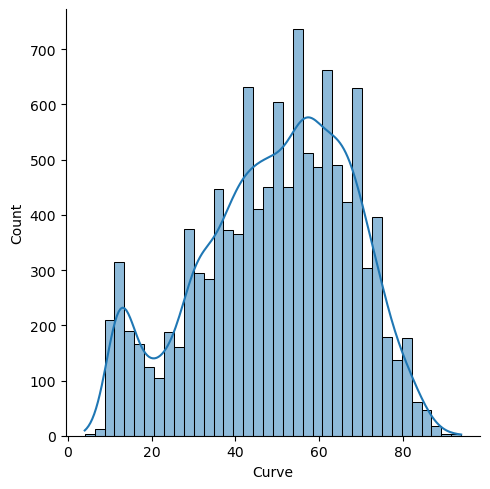

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


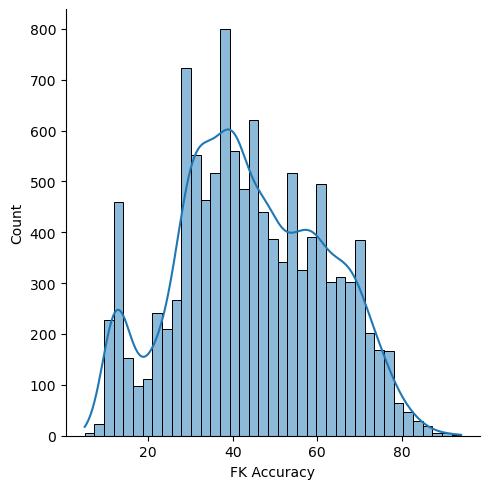

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


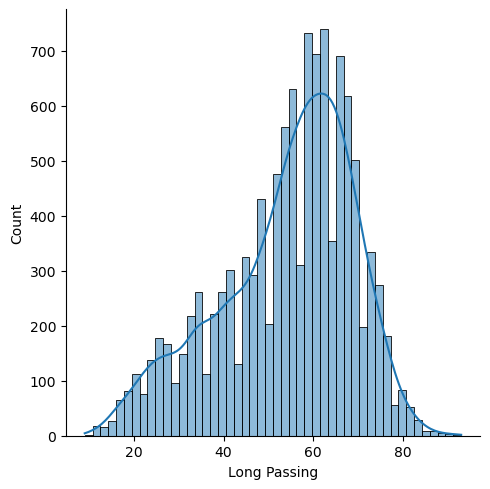

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


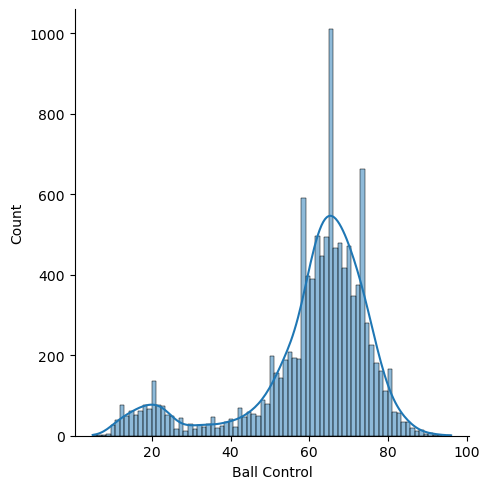

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


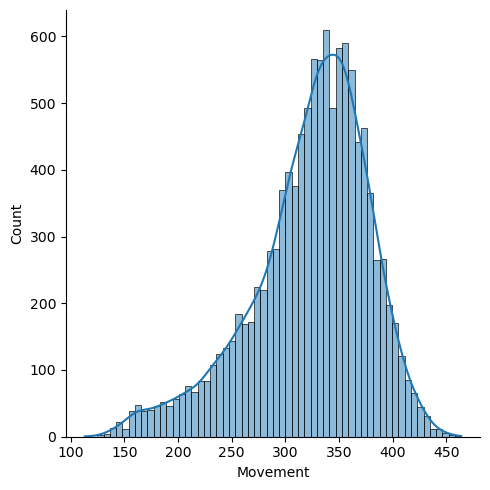

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


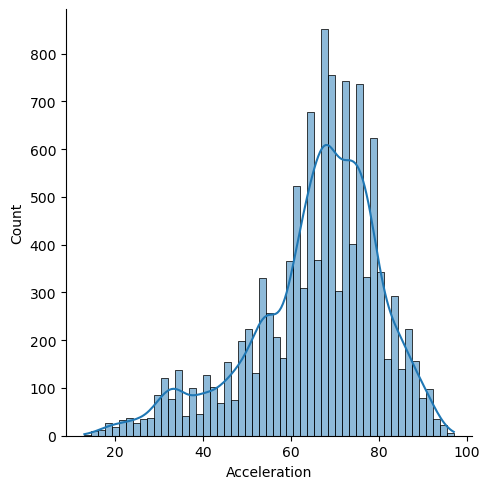

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


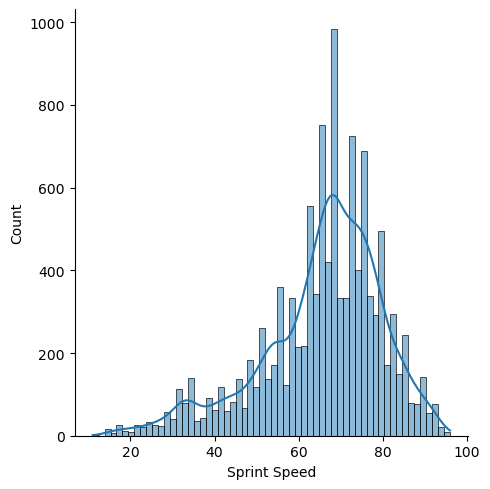

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


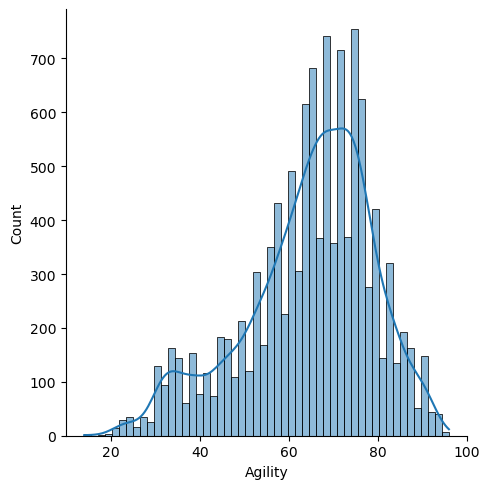

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


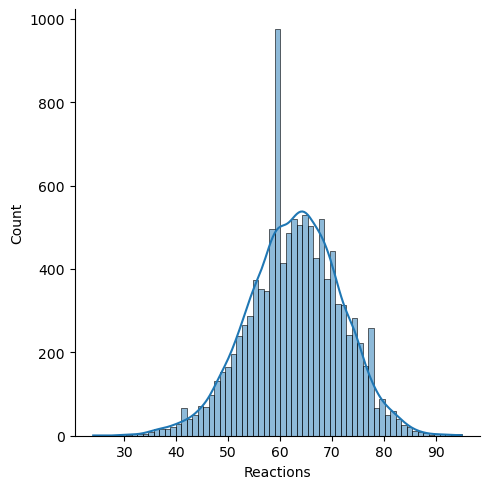

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


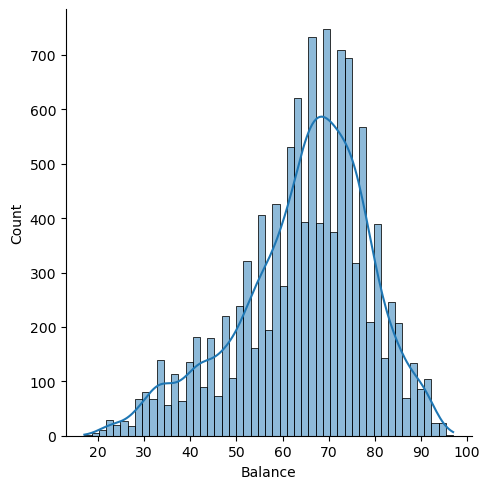

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


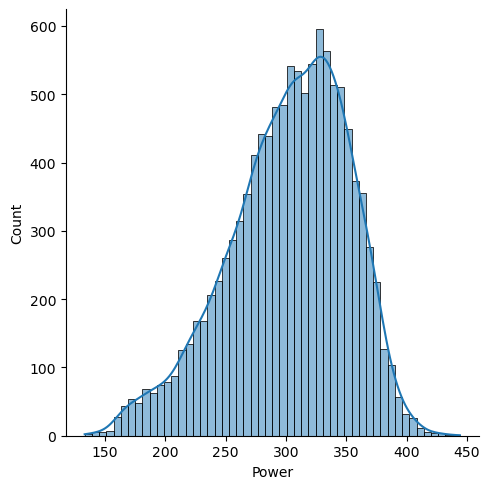

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


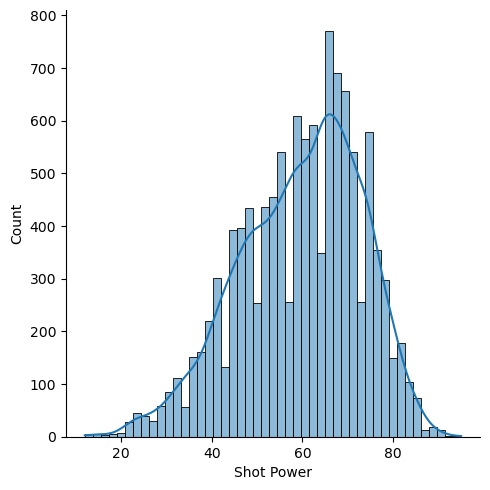

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


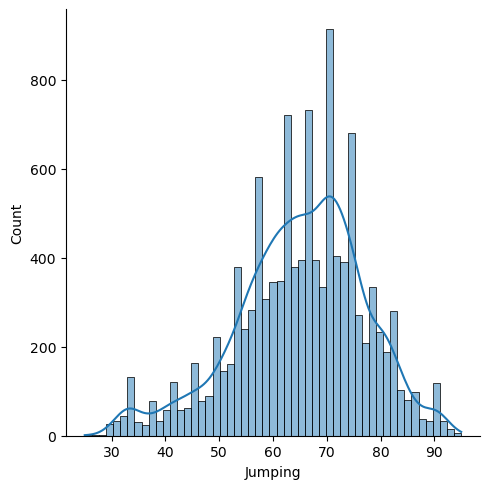

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


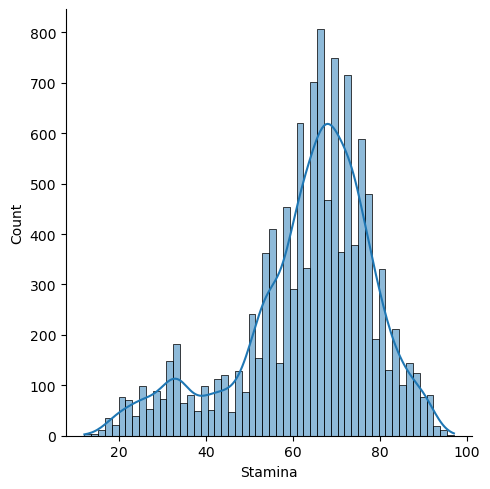

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


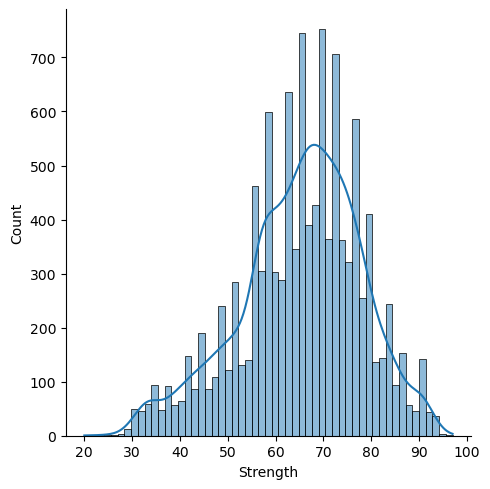

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


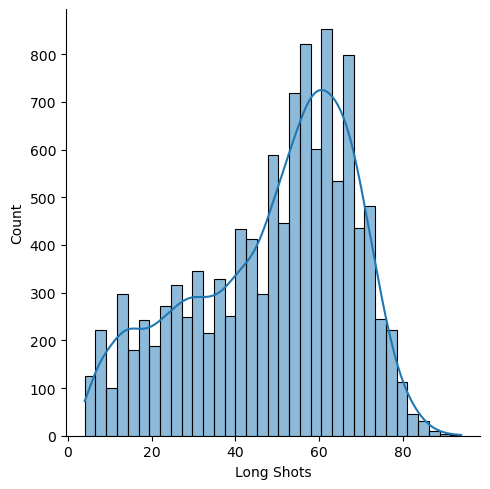

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


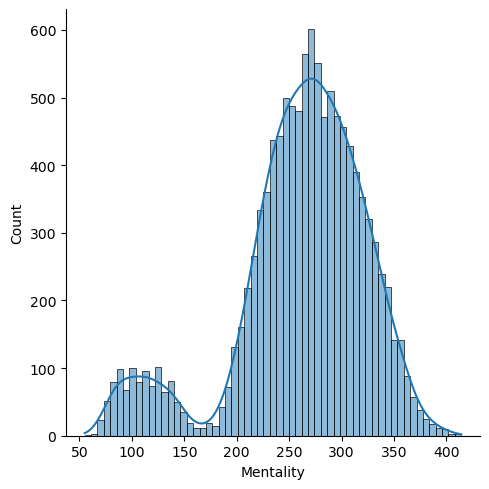

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


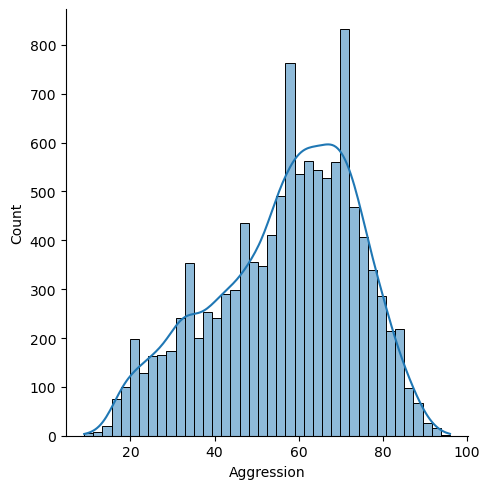

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


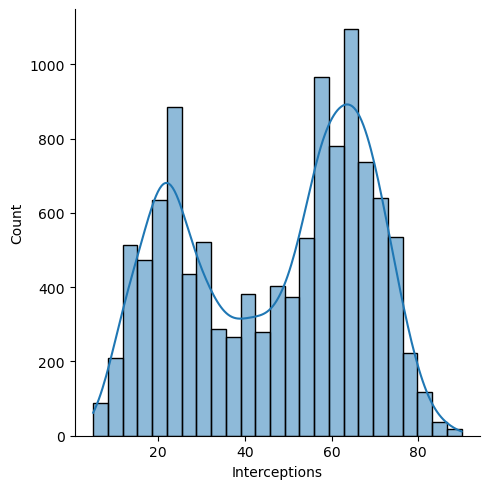

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


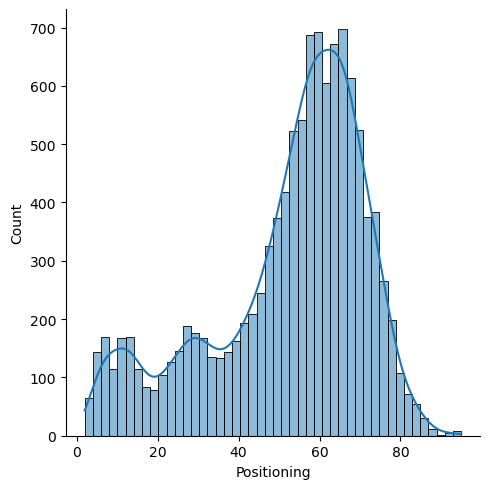

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


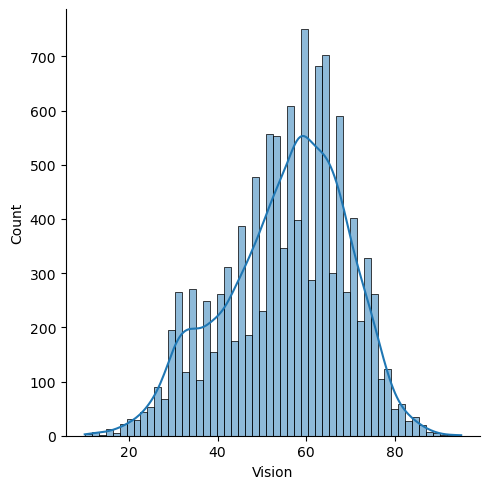

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


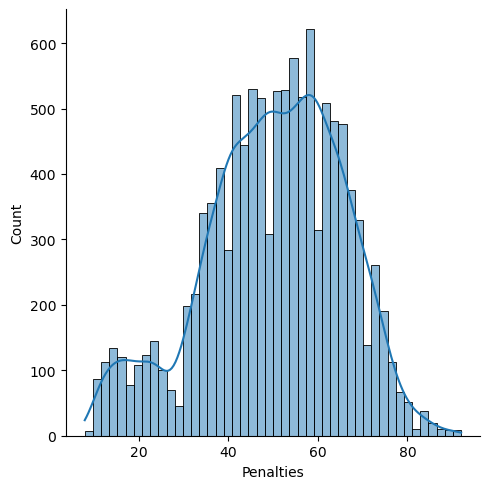

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


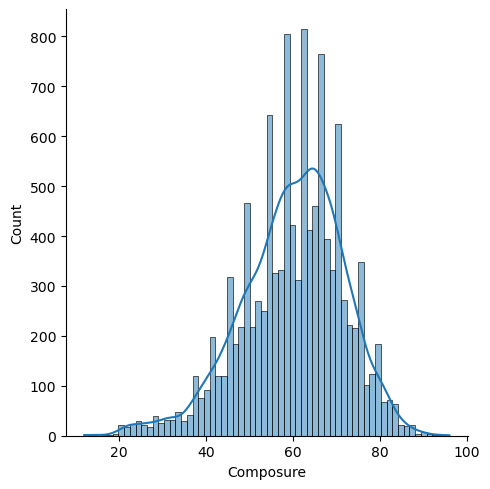

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


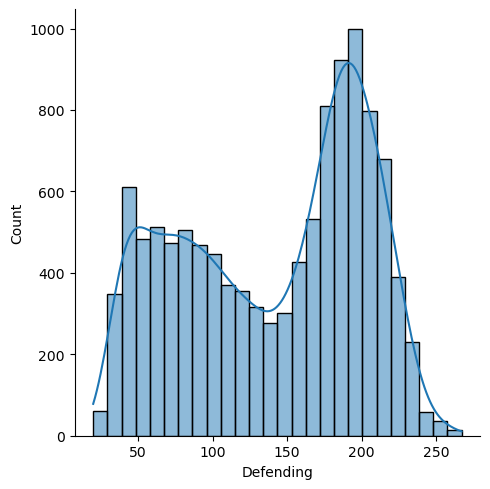

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


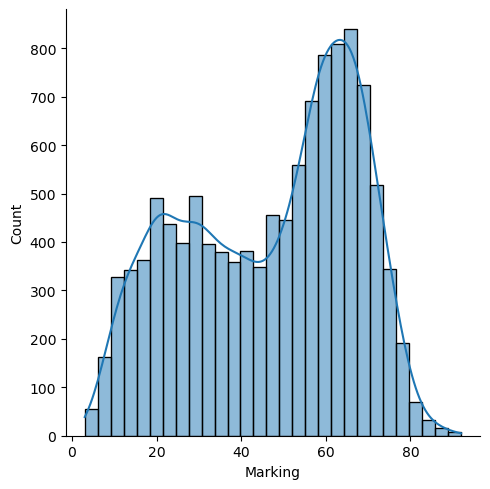

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


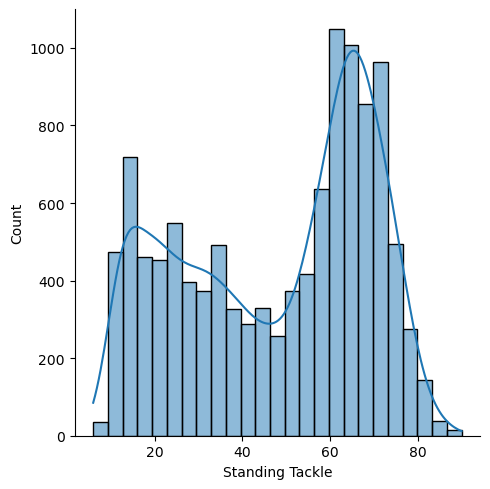

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


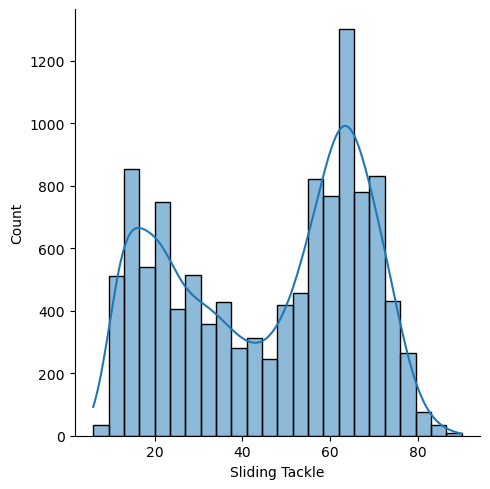

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


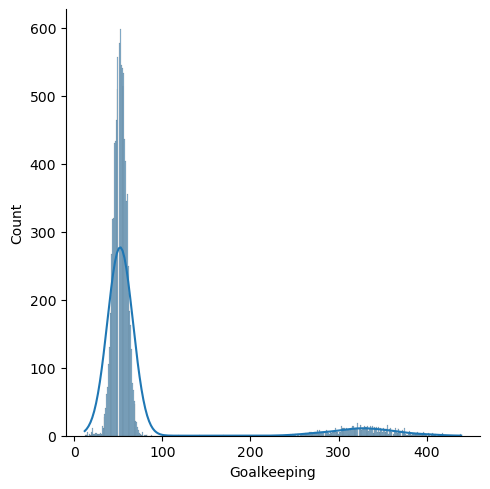

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


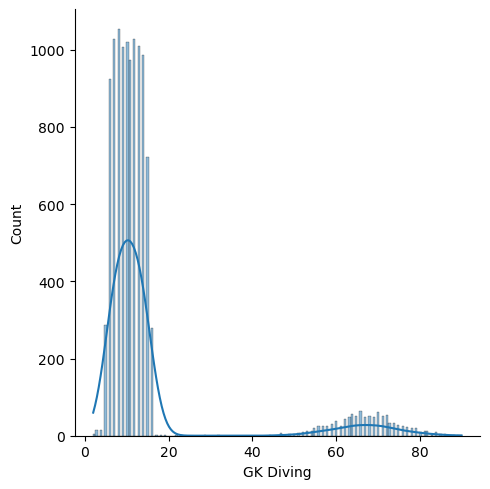

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


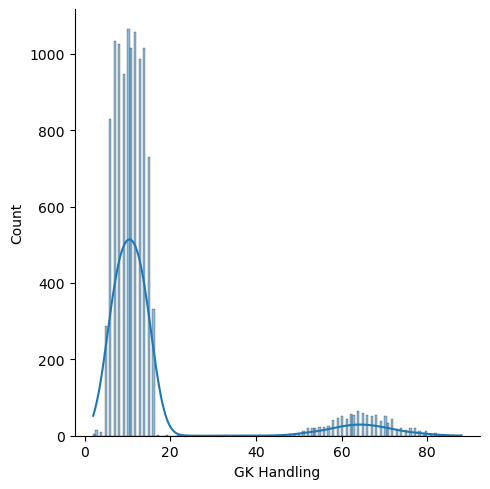

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


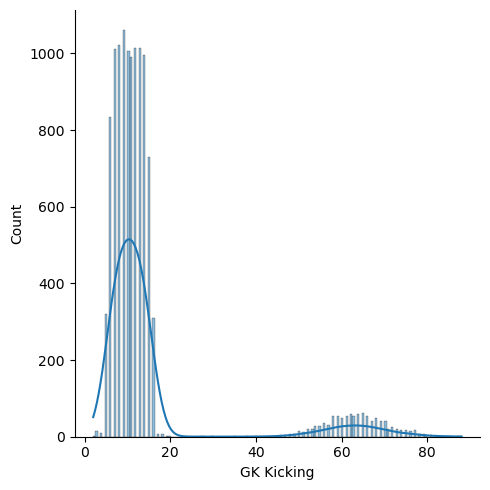

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


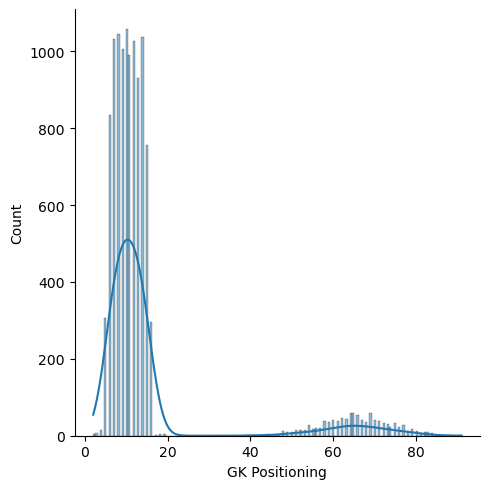

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


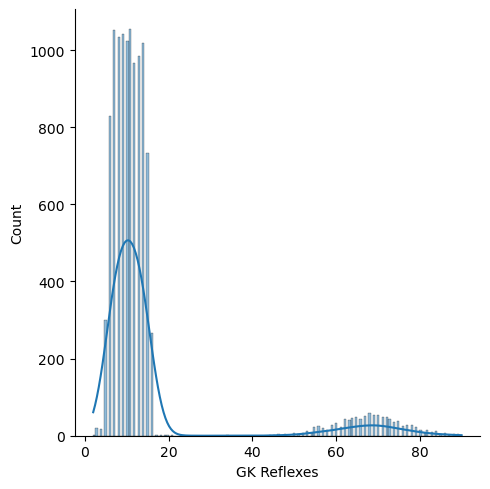

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


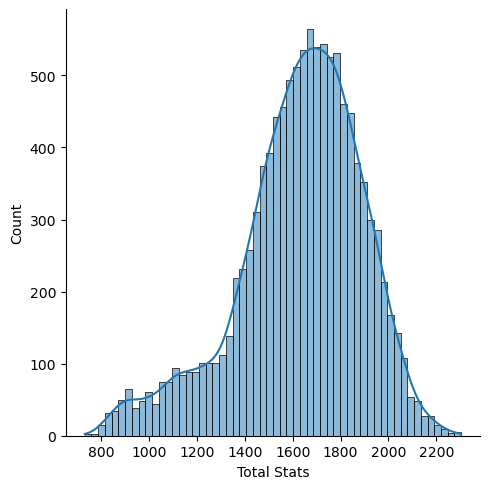

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


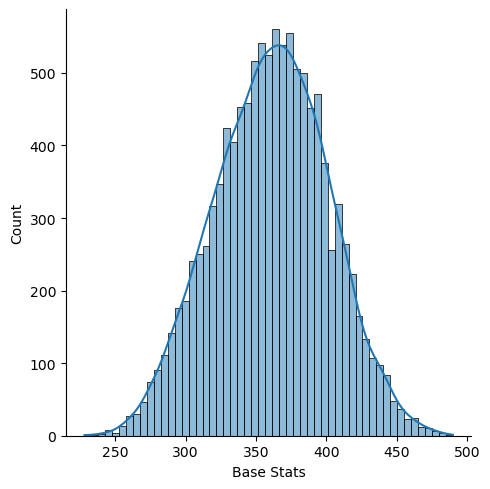

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


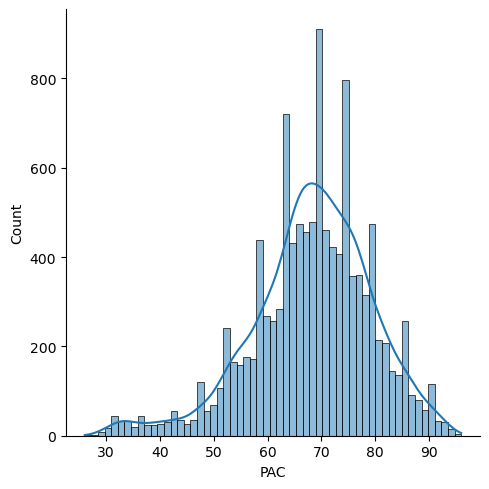

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


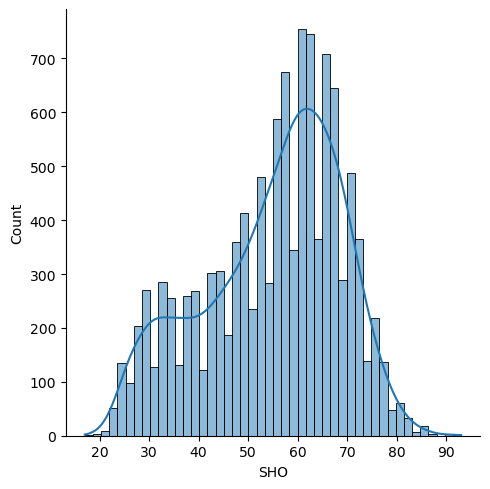

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


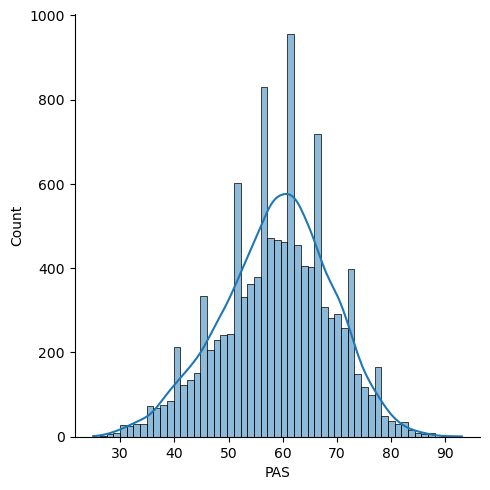

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


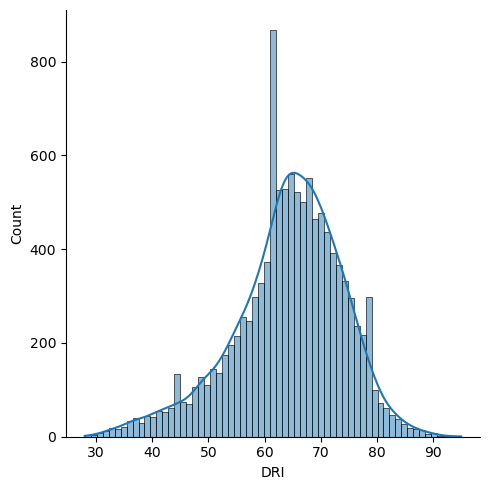

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


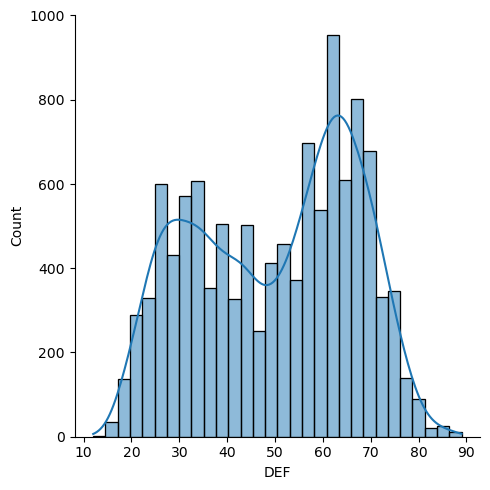

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


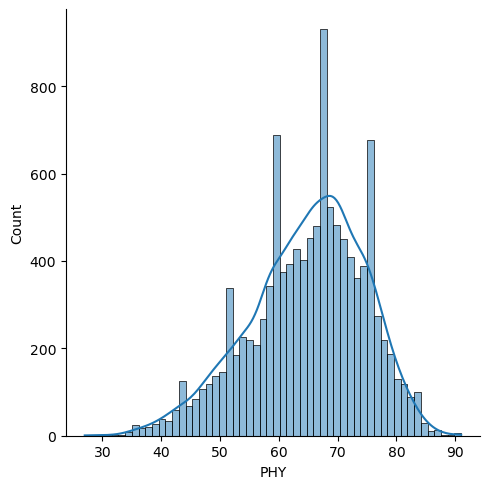

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


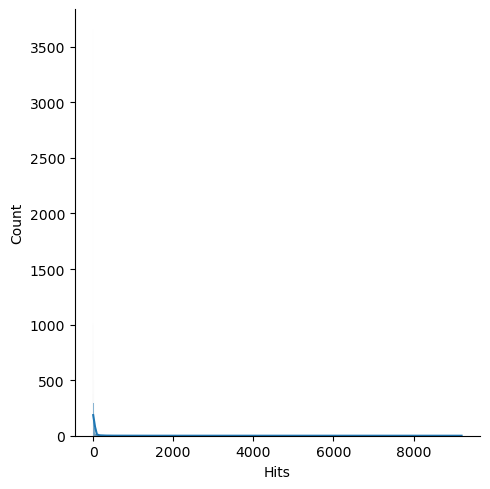

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


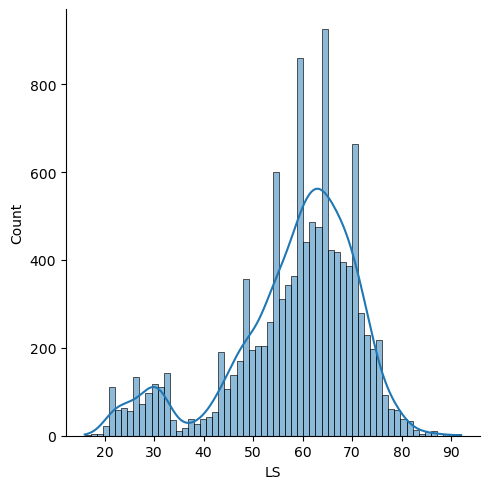

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


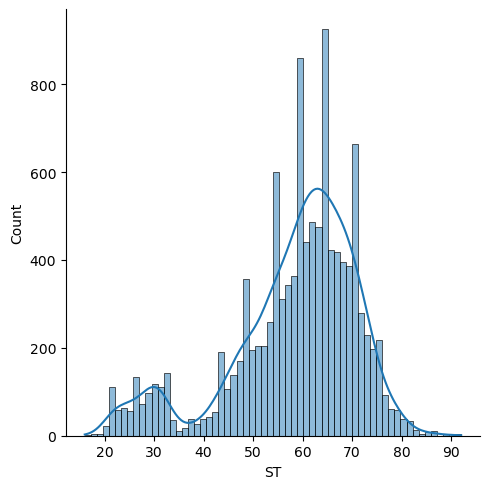

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


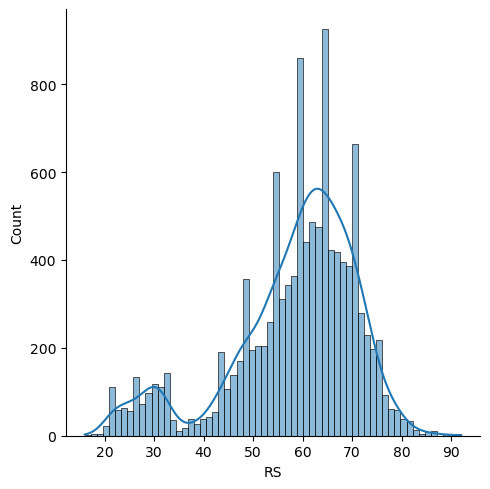

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


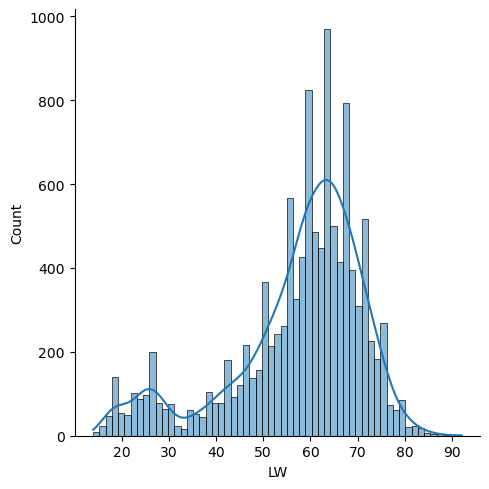

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


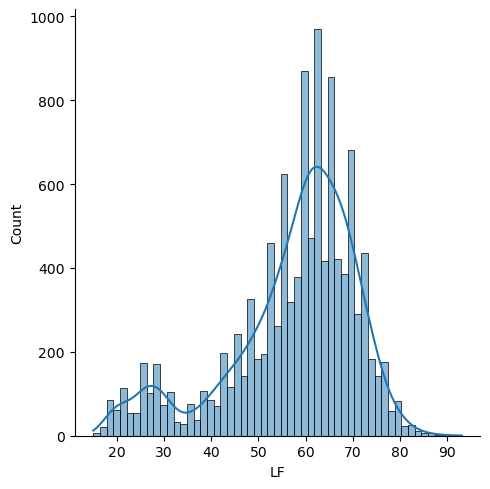

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


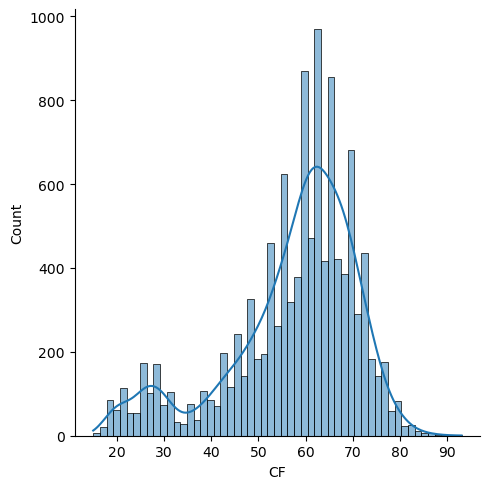

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


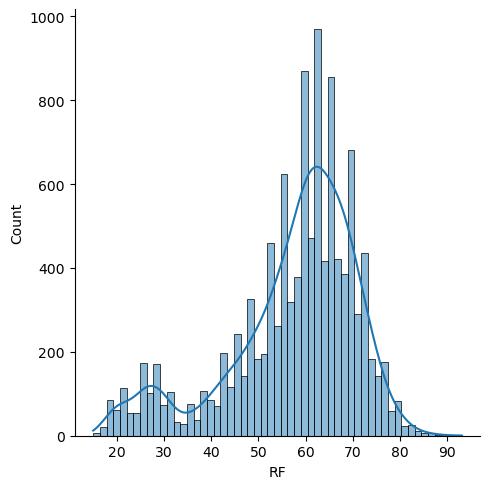

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


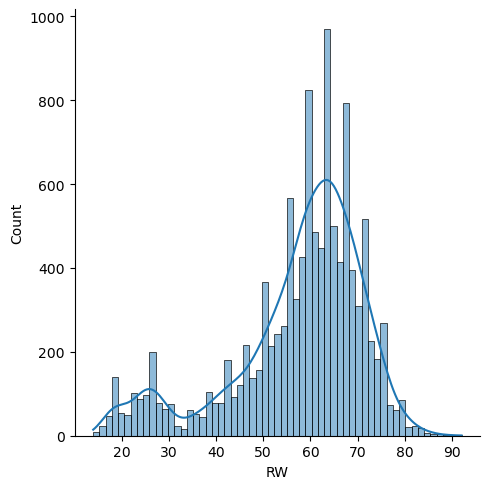

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


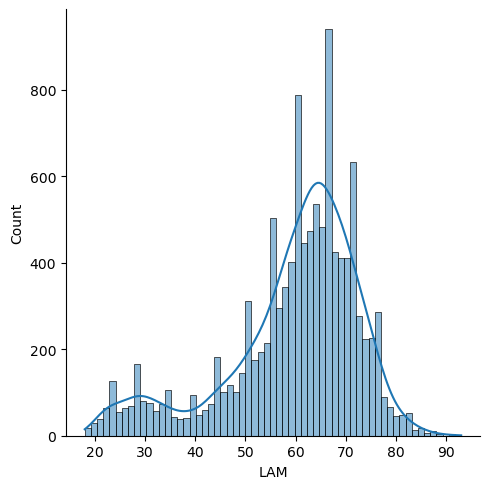

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


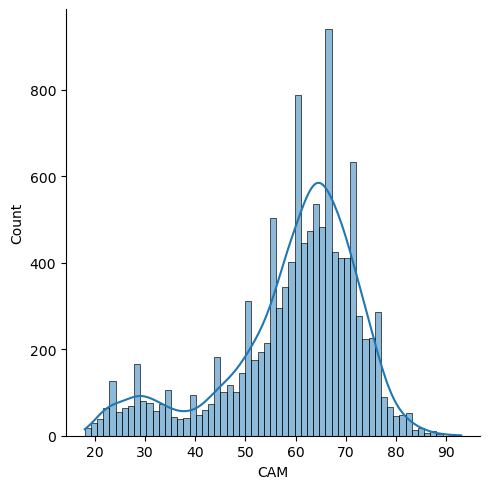

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


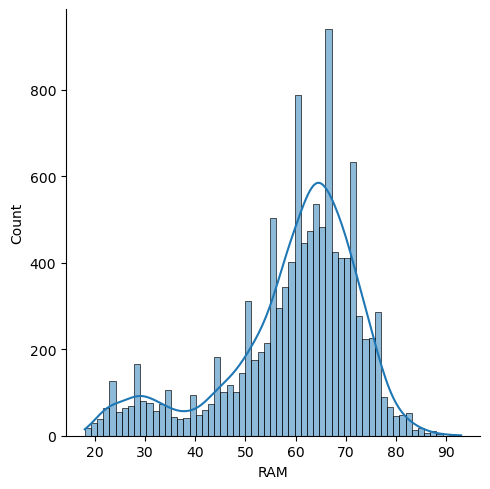

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


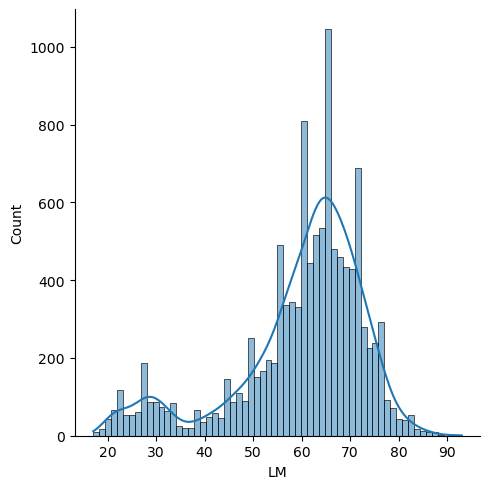

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


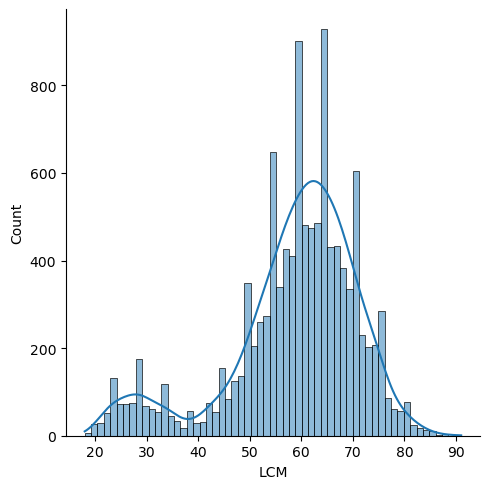

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


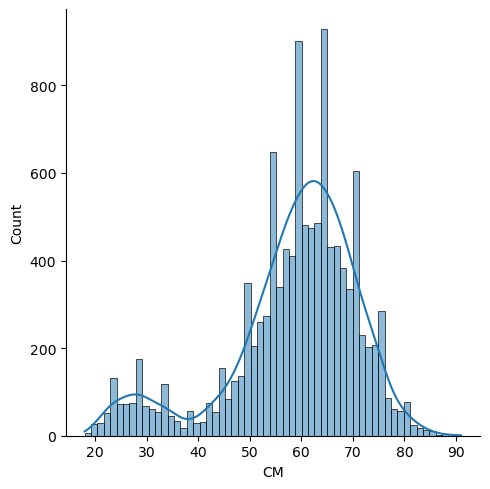

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


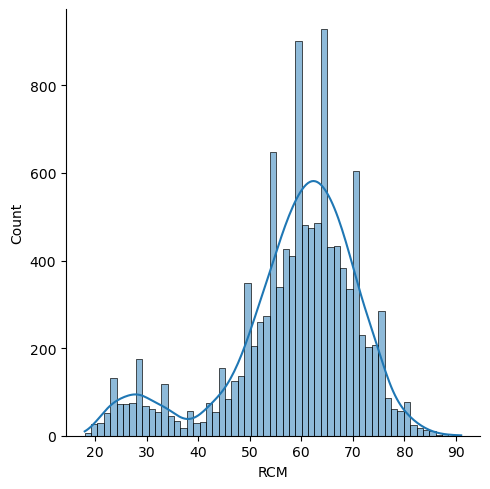

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


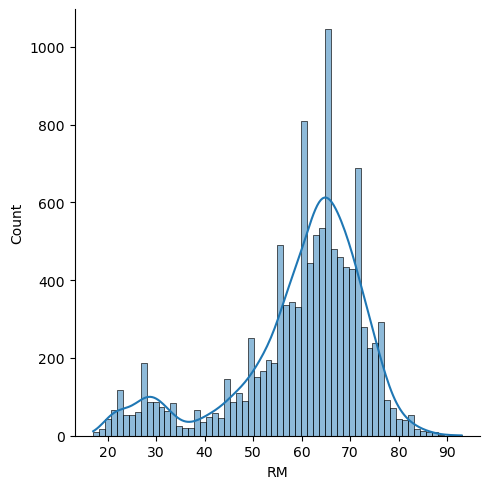

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


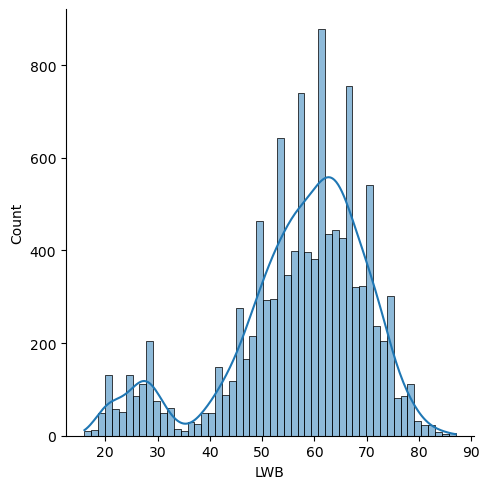

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


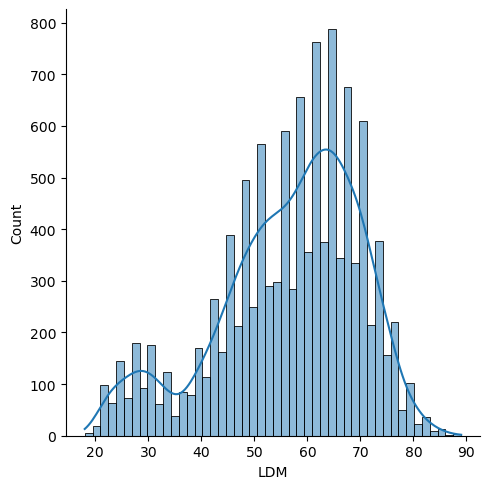

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


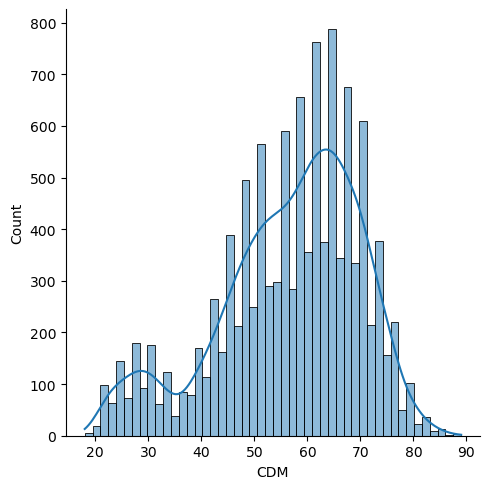

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


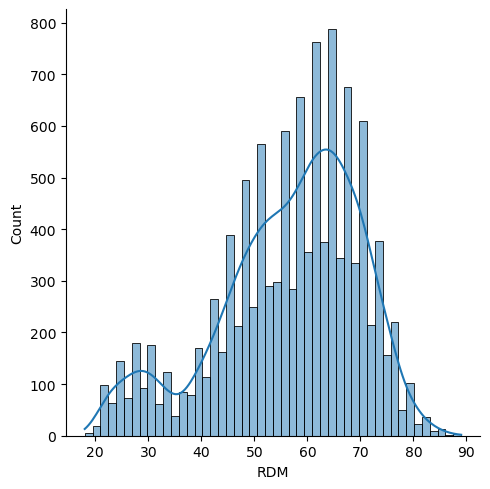

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


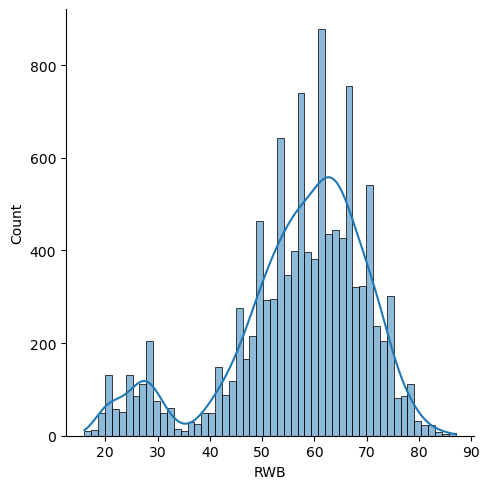

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


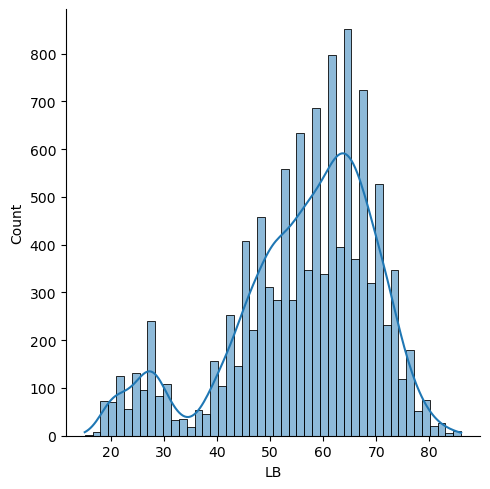

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


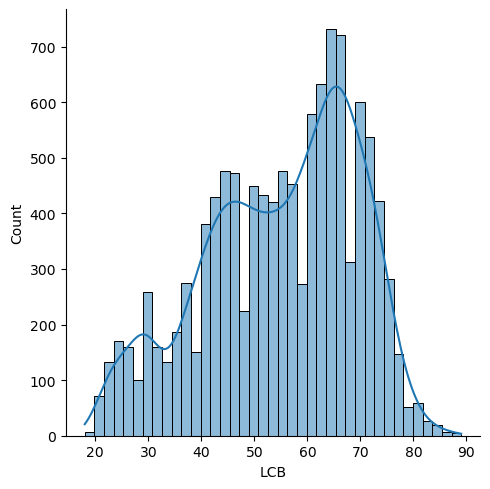

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


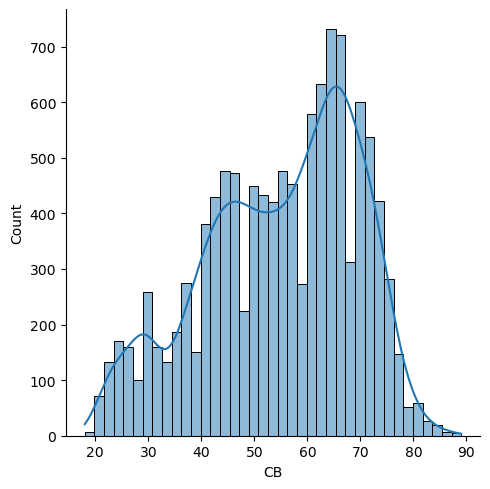

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


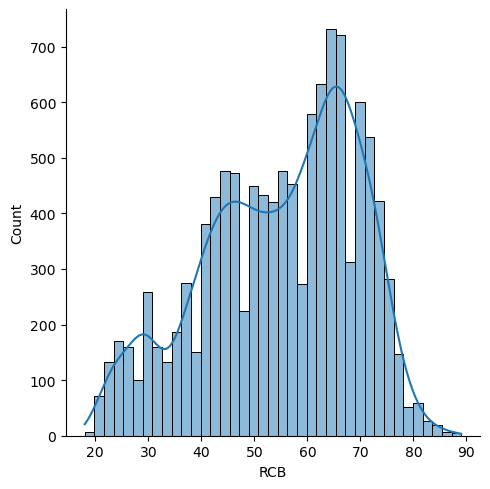

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


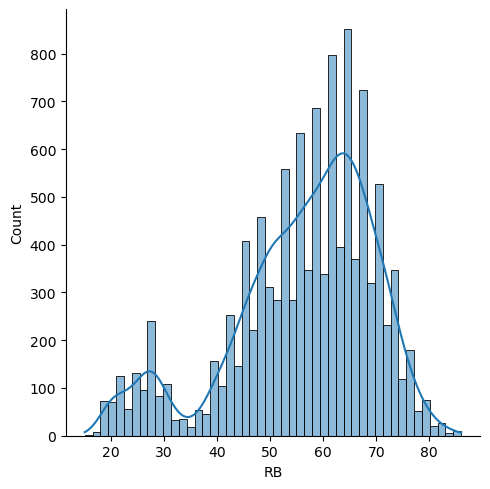

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


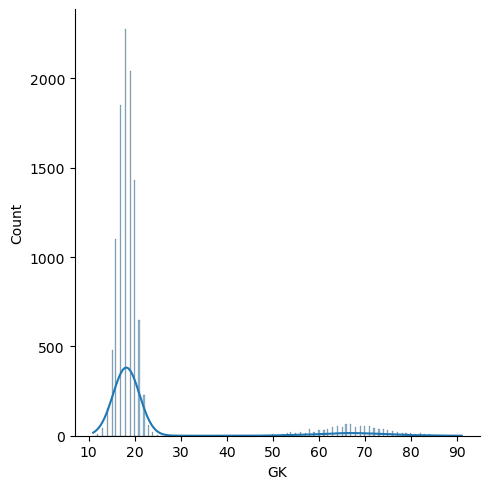

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


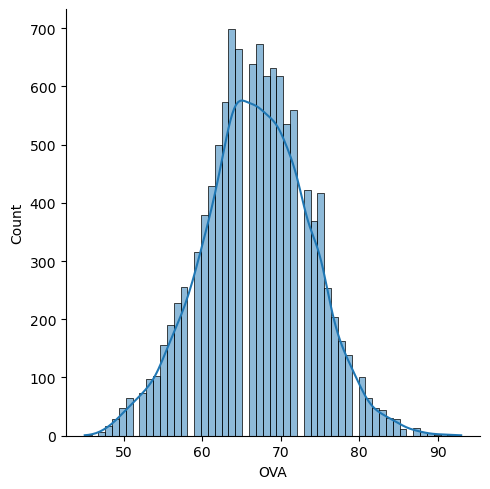

In [28]:
for column in numerical.columns:
    sns.displot(numerical[column],kde=True)
    plt.show()

In [29]:
correlations = numerical.corr()
correlations

Age    Growth     Value      Wage  Attacking  Crossing  \
Age        1.000000 -0.864768  0.107826  0.194779   0.188316  0.156740   
Growth    -0.864768  1.000000 -0.191092 -0.232974  -0.280575 -0.252235   
Value      0.107826 -0.191092  1.000000  0.829477   0.289213  0.251425   
Wage       0.194779 -0.232974  0.829477  1.000000   0.280217  0.240083   
Attacking  0.188316 -0.280575  0.289213  0.280217   1.000000  0.842814   
...             ...       ...       ...       ...        ...       ...   
CB         0.202474 -0.257416  0.210652  0.220472   0.499404  0.506435   
RCB        0.202474 -0.257416  0.210652  0.220472   0.499404  0.506435   
RB         0.155980 -0.243793  0.253981  0.245971   0.651129  0.706027   
GK         0.152881 -0.087543  0.051607  0.030995  -0.739751 -0.630590   
OVA        0.517065 -0.599993  0.642894  0.580934   0.432392  0.390126   

           Finishing  Heading Accuracy  Short Passing   Volleys  ...  \
Age         0.107457          0.173028       0.180768  0.184972  ...   
Growth     -0.189307         -0.228301      -0.271896 -0.250887  ...   
Value       0.231092          0.166929       0.327850  0.255782  ...   
Wage        0.207146          0.193164       0.311045  0.244894  ...   
Attacking   0.879111          0.706844       0.881272  0.898262  ...   
...              ...               ...            ...       ...  ...   
CB          0.117082          0.698198       0.672187  0.201969  ...   
RCB         0.117082          0.698198       0.672187  0.201969  ...   
RB          0.294231          0.663381       0.796786  0.360978  ...   
GK         -0.562148         -0.698770      -0.691789 -0.554261  ...   
OVA         0.306170          0.300564       0.492056  0.360874  ...   

                CDM       RDM       RWB        LB       LCB        CB  \
Age        0.221769  0.221769  0.158508  0.155980  0.202474  0.202474   
Growth    -0.294535 -0.294535 -0.255553 -0.243793 -0.257416 -0.257416   
Value      0.281198  0.281198  0.277371  0.253981  0.210652  0.210652   
Wage       0.277723  0.277723  0.263646  0.245971  0.220472  0.220472   
Attacking  0.648238  0.648238  0.720487  0.651129  0.499404  0.499404   
...             ...       ...       ...       ...       ...       ...   
CB         0.961806  0.961806  0.914098  0.952819  1.000000  1.000000   
RCB        0.961806  0.961806  0.914098  0.952819  1.000000  1.000000   
RB         0.982302  0.982302  0.991808  1.000000  0.952819  0.952819   
GK        -0.621417 -0.621417 -0.692949 -0.667407 -0.568730 -0.568730   
OVA        0.463707  0.463707  0.436263  0.409198  0.377735  0.377735   

                RCB        RB        GK       OVA  
Age        0.202474  0.155980  0.152881  0.517065  
Growth    -0.257416 -0.243793 -0.087543 -0.599993  
Value      0.210652  0.253981  0.051607  0.642894  
Wage       0.220472  0.245971  0.030995  0.580934  
Attacking  0.499404  0.651129 -0.739751  0.432392  
...             ...       ...       ...       ...  
CB         1.000000  0.952819 -0.568730  0.377735  
RCB        1.000000  0.952819 -0.568730  0.377735  
RB         0.952819  1.000000 -0.667407  0.409198  
GK        -0.568730 -0.667407  1.000000  0.100928  
OVA        0.377735  0.409198  0.100928  1.000000  

[82 rows x 82 columns]

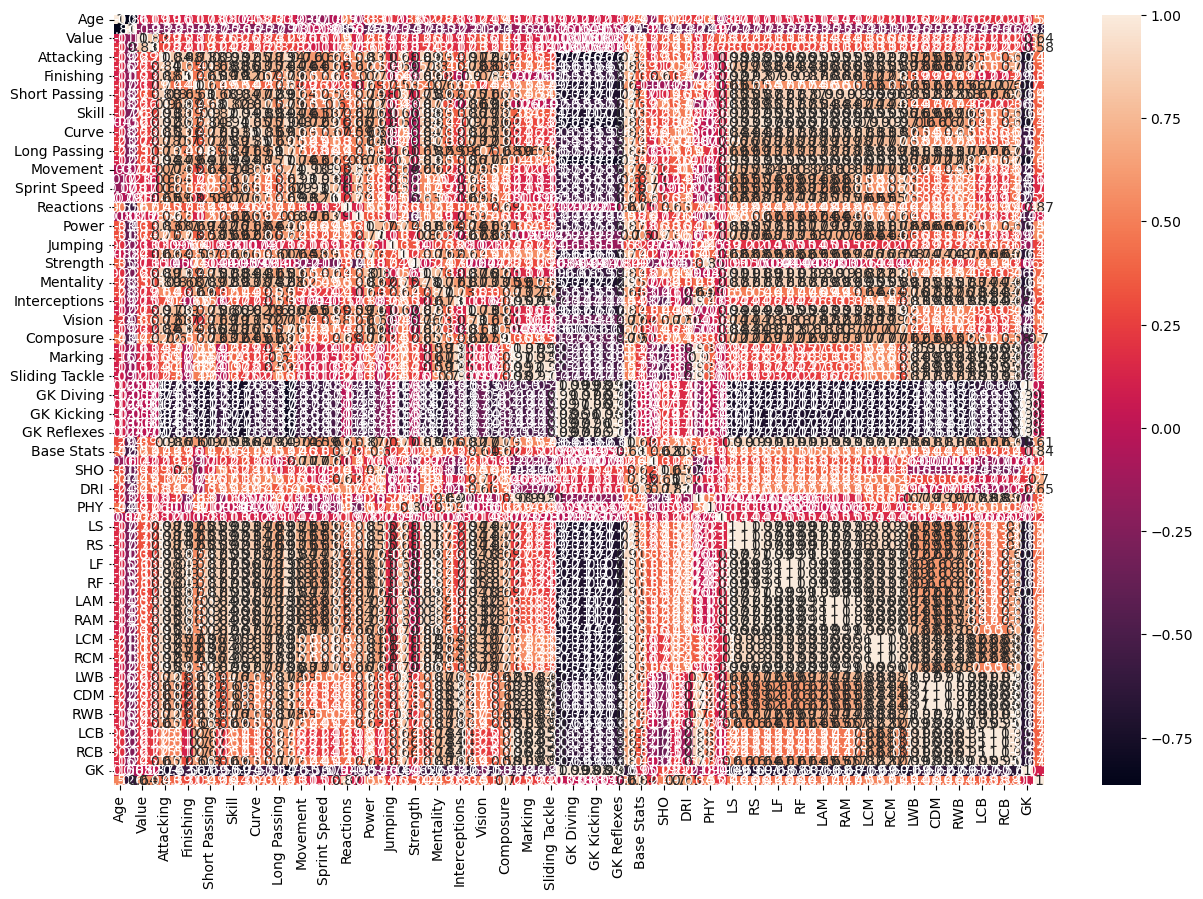

In [30]:
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

In [31]:
X=data_cleaned.drop('OVA', axis=1)     
y=data_cleaned['OVA']

data_cleaned

Age   BP  Growth      Value     Wage  Attacking  Crossing  Finishing  \
0       26   CM       1   525000.0   4000.0        258        54         47   
1       30   ST       0  8500000.0  23000.0        365        66         79   
2       33  CAM       0  9000000.0  49000.0        336        73         76   
3       22  CDM      13   275000.0   4000.0        242        44         42   
4       23  CDM       8   725000.0   2000.0        249        49         37   
...    ...  ...     ...        ...      ...        ...       ...        ...   
11695   29   ST       0   550000.0    500.0        290        36         72   
11696   25   LB       5   625000.0   3000.0        224        62         24   
11697   27   GK       4  1600000.0   4000.0         84        12         14   
11698   22   RM       8  1100000.0   2000.0        286        64         66   
11700   22  CAM       9   700000.0   2000.0        289        43         64   

       Heading Accuracy  Short Passing  ...  CDM  RDM  RWB  LB  LCB  CB  RCB  \
0                    43             70  ...   60   60   60  59   55  55   55   
1                    76             68  ...   55   55   59  55   50  50   50   
2                    34             78  ...   58   58   61  55   43  43   43   
3                    58             62  ...   60   60   58  59   60  60   60   
4                    61             68  ...   66   66   66  65   63  63   63   
...                 ...            ...  ...  ...  ...  ...  ..  ...  ..  ...   
11695                65             57  ...   47   47   48  46   45  45   45   
11696                51             59  ...   62   62   65  65   63  63   63   
11697                13             29  ...   28   28   27  26   28  28   28   
11698                51             64  ...   46   46   51  47   37  37   37   
11700                65             64  ...   45   45   48  46   38  38   38   

       RB  GK  OVA  
0      59  16   64  
1      55  20   77  
2      55  14   80  
3      59  16   59  
4      65  17   65  
...    ..  ..  ...  
11695  46  21   65  
11696  65  18   65  
11697  26  71   70  
11698  47  19   67  
11700  46  17   64  

[11422 rows x 88 columns]

In [32]:
X_num1 = X.select_dtypes(np.number)
X_cat1 = X.select_dtypes(object)

In [33]:
X_num1.shape

(11422, 81)

In [34]:
X_num=X._get_numeric_data()
X_cat=X.drop(columns=X_num.columns)

print (X.shape, X_num.shape, X_cat.shape)

(11422, 87) (11422, 81) (11422, 6)


In [35]:
X_num.describe()

Age        Growth         Value           Wage     Attacking  \
count  11422.000000  11422.000000  1.142200e+04   11422.000000  11422.000000   
mean      25.155577      5.593241  2.584324e+06   10312.182630    258.114253   
std        4.872713      5.824869  5.317007e+06   21161.225373     72.216611   
min       16.000000      0.000000  0.000000e+00       0.000000     42.000000   
25%       21.000000      0.000000  3.750000e+05    1000.000000    231.250000   
50%       25.000000      4.000000  8.000000e+05    3000.000000    271.000000   
75%       29.000000     10.000000  2.500000e+06   10000.000000    305.000000   
max       43.000000     26.000000  9.000000e+07  560000.000000    437.000000   

           Crossing     Finishing  Heading Accuracy  Short Passing  \
count  11422.000000  11422.000000      11422.000000   11422.000000   
mean      51.499037     47.941779         53.377079      60.363947   
std       17.853203     19.385843         16.918882      13.939404   
min        6.000000      3.000000          5.000000      11.000000   
25%       41.000000     33.000000         45.000000      56.000000   
50%       56.000000     52.000000         56.000000      63.000000   
75%       65.000000     64.000000         65.000000      69.000000   
max       94.000000     95.000000         93.000000      94.000000   

            Volleys  ...           LDM           CDM           RDM  \
count  11422.000000  ...  11422.000000  11422.000000  11422.000000   
mean      44.932411  ...     56.497986     56.497986     56.497986   
std       17.682967  ...     13.424496     13.424496     13.424496   
min        4.000000  ...     18.000000     18.000000     18.000000   
25%       32.000000  ...     49.000000     49.000000     49.000000   
50%       46.000000  ...     59.000000     59.000000     59.000000   
75%       58.000000  ...     66.000000     66.000000     66.000000   
max       90.000000  ...     89.000000     89.000000     89.000000   

                RWB            LB           LCB            CB           RCB  \
count  11422.000000  11422.000000  11422.000000  11422.000000  11422.000000   
mean      56.991945     56.207757     54.901593     54.901593     54.901593   
std       13.231299     13.535511     14.404343     14.404343     14.404343   
min       16.000000     15.000000     18.000000     18.000000     18.000000   
25%       51.000000     49.000000     45.000000     45.000000     45.000000   
50%       59.000000     59.000000     57.000000     57.000000     57.000000   
75%       66.000000     66.000000     66.000000     66.000000     66.000000   
max       87.000000     86.000000     89.000000     89.000000     89.000000   

                 RB            GK  
count  11422.000000  11422.000000  
mean      56.207757     22.732184  
std       13.535511     14.512683  
min       15.000000     11.000000  
25%       49.000000     17.000000  
50%       59.000000     18.000000  
75%       66.000000     20.000000  
max       86.000000     91.000000  

[8 rows x 81 columns]

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [37]:
transformer = MinMaxScaler().fit(X_num)
X_norm = transformer.transform(X_num)
print(X_norm.shape)
X_num_scale = pd.DataFrame(X_norm, columns=X_num.columns)
X_num_scale.head()

(11422, 81)


Age    Growth     Value      Wage  Attacking  Crossing  Finishing  \
0  0.370370  0.038462  0.005833  0.007143   0.546835  0.545455   0.478261   
1  0.518519  0.000000  0.094444  0.041071   0.817722  0.681818   0.826087   
2  0.629630  0.000000  0.100000  0.087500   0.744304  0.761364   0.793478   
3  0.222222  0.500000  0.003056  0.007143   0.506329  0.431818   0.423913   
4  0.259259  0.307692  0.008056  0.003571   0.524051  0.488636   0.369565   

   Heading Accuracy  Short Passing   Volleys  ...       LDM       CDM  \
0          0.431818       0.710843  0.465116  ...  0.591549  0.591549   
1          0.806818       0.686747  0.837209  ...  0.521127  0.521127   
2          0.329545       0.807229  0.825581  ...  0.563380  0.563380   
3          0.602273       0.614458  0.372093  ...  0.591549  0.591549   
4          0.636364       0.686747  0.348837  ...  0.676056  0.676056   

        RDM       RWB        LB       LCB        CB       RCB        RB  \
0  0.591549  0.619718  0.619718  0.521127  0.521127  0.521127  0.619718   
1  0.521127  0.605634  0.563380  0.450704  0.450704  0.450704  0.563380   
2  0.563380  0.633803  0.563380  0.352113  0.352113  0.352113  0.563380   
3  0.591549  0.591549  0.619718  0.591549  0.591549  0.591549  0.619718   
4  0.676056  0.704225  0.704225  0.633803  0.633803  0.633803  0.704225   

       GK  
0  0.0625  
1  0.1125  
2  0.0375  
3  0.0625  
4  0.0750  

[5 rows x 81 columns]

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

BP_CB  BP_CDM  BP_CF  BP_CM  BP_GK  BP_LB  BP_LM  BP_LW  BP_LWB  BP_RB  \
0    0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0    0.0   
1    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
2    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
3    0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
4    0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   

   ...  SM_4★  SM_5★  A/W_Low  A/W_Medium  D/W_Low  D/W_Medium  IR_2 ★  \
0  ...    0.0    0.0      0.0         0.0      0.0         1.0     0.0   
1  ...    1.0    0.0      0.0         0.0      1.0         0.0     1.0   
2  ...    1.0    0.0      0.0         0.0      0.0         1.0     1.0   
3  ...    0.0    0.0      0.0         1.0      0.0         1.0     0.0   
4  ...    0.0    0.0      1.0         0.0      0.0         1.0     0.0   

   IR_3 ★  IR_4 ★  IR_5 ★  
0     0.0     0.0     0.0  
1     0.0     0.0     0.0  
2     0.0     0.0     0.0  
3     0.0     0.0     0.0  
4     0.0     0.0     0.0  

[5 rows x 30 columns]

In [40]:
X=pd.concat([X_num_scale, X_cat_encode], axis=1) 
X.describe()

Age        Growth         Value          Wage     Attacking  \
count  11422.000000  11422.000000  11422.000000  11422.000000  11422.000000   
mean       0.339095      0.215125      0.028715      0.018415      0.547125   
std        0.180471      0.224033      0.059078      0.037788      0.182827   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.185185      0.000000      0.004167      0.001786      0.479114   
50%        0.333333      0.153846      0.008889      0.005357      0.579747   
75%        0.481481      0.384615      0.027778      0.017857      0.665823   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           Crossing     Finishing  Heading Accuracy  Short Passing  \
count  11422.000000  11422.000000      11422.000000   11422.000000   
mean       0.517035      0.488498          0.549740       0.594746   
std        0.202877      0.210716          0.192260       0.167945   
min        0.000000      0.000000          0.000000       0.000000   
25%        0.397727      0.326087          0.454545       0.542169   
50%        0.568182      0.532609          0.579545       0.626506   
75%        0.670455      0.663043          0.681818       0.698795   
max        1.000000      1.000000          1.000000       1.000000   

            Volleys  ...         SM_4★         SM_5★       A/W_Low  \
count  11422.000000  ...  11422.000000  11422.000000  11422.000000   
mean       0.475958  ...      0.073455      0.003852      0.050779   
std        0.205616  ...      0.260893      0.061949      0.219556   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.325581  ...      0.000000      0.000000      0.000000   
50%        0.488372  ...      0.000000      0.000000      0.000000   
75%        0.627907  ...      0.000000      0.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

         A/W_Medium       D/W_Low    D/W_Medium        IR_2 ★        IR_3 ★  \
count  11422.000000  11422.000000  11422.000000  11422.000000  11422.000000   
mean       0.642882      0.106374      0.718351      0.080546      0.020837   
std        0.479171      0.308329      0.449823      0.272149      0.142845   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      1.000000      0.000000      0.000000   
75%        1.000000      0.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             IR_4 ★        IR_5 ★  
count  11422.000000  11422.000000  
mean       0.002977      0.000350  
std        0.054480      0.018711  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 111 columns]

In [41]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X, y, test_size=.2)

In [42]:
X_train

Age    Growth     Value      Wage  Attacking  Crossing  Finishing  \
2637   0.370370  0.076923  0.014444  0.008929   0.610127  0.681818   0.608696   
9623   0.444444  0.000000  0.088889  0.058929   0.706329  0.647727   0.510870   
10342  0.074074  0.384615  0.004167  0.000893   0.513924  0.636364   0.586957   
742    0.111111  0.615385  0.001889  0.003571   0.450633  0.375000   0.521739   
700    0.148148  0.500000  0.006667  0.003571   0.600000  0.534091   0.630435   
...         ...       ...       ...       ...        ...       ...        ...   
10441  0.481481  0.000000  0.026667  0.033929   0.729114  0.545455   0.717391   
5794   0.333333  0.038462  0.003889  0.000893   0.602532  0.590909   0.630435   
1696   0.111111  0.500000  0.004444  0.001161   0.481013  0.568182   0.467391   
10002  0.111111  0.615385  0.001333  0.001786   0.306329  0.397727   0.206522   
4911   0.629630  0.000000  0.004444  0.007143   0.731646  0.625000   0.695652   

       Heading Accuracy  Short Passing   Volleys  ...  SM_4★  SM_5★  A/W_Low  \
2637           0.386364       0.686747  0.546512  ...    0.0    0.0      0.0   
9623           0.818182       0.831325  0.546512  ...    0.0    0.0      0.0   
10342          0.318182       0.542169  0.383721  ...    0.0    0.0      0.0   
742            0.318182       0.481928  0.488372  ...    0.0    0.0      0.0   
700            0.545455       0.530120  0.616279  ...    0.0    0.0      0.0   
...                 ...            ...       ...  ...    ...    ...      ...   
10441          0.829545       0.650602  0.697674  ...    0.0    0.0      0.0   
5794           0.602273       0.542169  0.500000  ...    0.0    0.0      0.0   
1696           0.329545       0.554217  0.406977  ...    0.0    0.0      0.0   
10002          0.386364       0.301205  0.244186  ...    0.0    0.0      0.0   
4911           0.738636       0.674699  0.720930  ...    0.0    0.0      0.0   

       A/W_Medium  D/W_Low  D/W_Medium  IR_2 ★  IR_3 ★  IR_4 ★  IR_5 ★  
2637          1.0      0.0         1.0     0.0     0.0     0.0     0.0  
9623          0.0      0.0         1.0     1.0     0.0     0.0     0.0  
10342         0.0      1.0         0.0     0.0     0.0     0.0     0.0  
742           1.0      0.0         1.0     0.0     0.0     0.0     0.0  
700           1.0      0.0         1.0     0.0     0.0     0.0     0.0  
...           ...      ...         ...     ...     ...     ...     ...  
10441         1.0      0.0         1.0     1.0     0.0     0.0     0.0  
5794          0.0      0.0         1.0     0.0     0.0     0.0     0.0  
1696          0.0      1.0         0.0     0.0     0.0     0.0     0.0  
10002         1.0      0.0         1.0     0.0     0.0     0.0     0.0  
4911          0.0      0.0         1.0     0.0     0.0     0.0     0.0  

[9137 rows x 111 columns]

In [43]:
y_train

2698     69
9860     77
10595    61
757      55
715      62
         ..
10695    71
5938     62
1736     60
10245    53
5032     66
Name: OVA, Length: 9137, dtype: int64

In [44]:
from sklearn.linear_model import LinearRegression as linreg

lm = linreg()    
lm.fit(X_train, y_train)  
y_pred = lm.predict(X_test) 

In [45]:
print (f'train R2: {lm.score(X_train, y_train)} - test R2: {lm.score(X_test, y_test)}')

train R2: 0.9190395793911399 - test R2: 0.9137775920559068


In [46]:
from sklearn.metrics import mean_squared_error as mse


train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred, y_test)

print (f'train MSE: {train_mse} - test MSE: {test_mse}')

train MSE: 3.82017106144619 - test MSE: 3.9239978080766207


In [47]:
print (f'train RMSE: {train_mse**.5} - test RMSE: {test_mse**.5}')

train RMSE: 1.9545257894042203 - test RMSE: 1.9809083290441838


In [48]:
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(lm.predict(X_train), y_train)
test_mae=mae(y_pred, y_test)

print (f'train MAE: {train_mae} - test MAE: {test_mae}')

train MAE: 1.5218648677766224 - test MAE: 1.5493760257111597
